In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:

# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

Text(0, 0.5, 'Precipitation Amounts (In)')

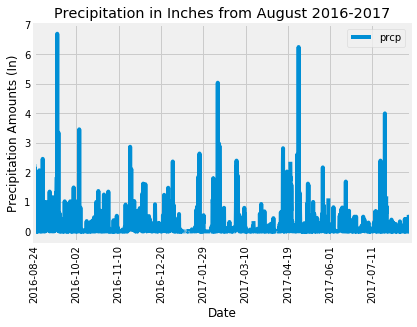

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#recent_data


# Perform a query to retrieve the data and precipitation scores

data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>(dt.date(2017,8,23) - dt.timedelta(days = 365))).order_by(Measurement.date).all()
#data

# Save the query results as a Pandas DataFrame and set the index to the date column

precip = pd.DataFrame(data)
precip_new = precip.set_index('date')
precip_new.head()

# Sort the dataframe by date

precip_new = precip_new.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

precip.plot('date', 'prcp')
plt.title("Precipitation in Inches from August 2016-2017")
plt.xlabel("Date")
plt.xticks(rotation = 'vertical')
plt.ylabel("Precipitation Amounts (In)")


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset

num_stat = session.query(Station).count()
num_stat

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stat = (session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
active_stat


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

ma_stat_low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
ma_stat_low

[(54.0)]

In [15]:
ma_stat_high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
ma_stat_high

[(85.0)]

In [16]:
ma_stat_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
ma_stat_avg

[(71.66378066378067)]

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_results = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >(dt.date(2017,8,23) - dt.timedelta(days = 365))).order_by(Measurement.date).all()
year_results_df = pd.DataFrame(year_results)

Text(0, 0.5, 'Frequency')

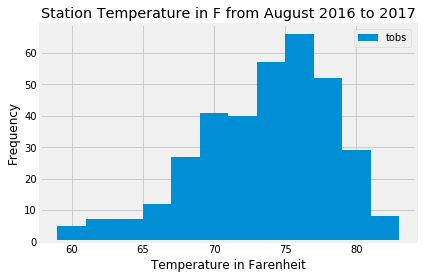

In [23]:
year_results_df.plot.hist(bins = 12)
plt.title("Station Temperature in F from August 2016 to 2017")
plt.xlabel ("Temperature in Farenheit")
plt.ylabel ("Frequency")

# Close session

In [24]:
# Close Session
session.close()